# Account Summary

In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
load_dotenv()

True

In [5]:
#PLAID_CLIENT_ID = os.getenv("5f134ff309ec71001107e7c6")
#PLAID_SECRET = os.getenv("c69415400520890b8a40899847a38d")
#PLAID_PUBLIC_KEY = os.getenv("9ec5186303aa2ba32fad46e58eef15")

PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

## Create a client to connect plaid

In [6]:
INSITUTION_ID = "ins_109508"

In [7]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

## Generate a public token

In [8]:
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID,['transactions','income','assets'])

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

access_token = exchange_response['access_token']

## Fetch Accounts

In [9]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'XxpDZBwwkyUZwxRVVlv1sXQl9MJJ6eFdE1PDa',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'DJK9mVwwQPTe1J3XX5MQUPVp9zDDvbcvQ4EZr',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'VBo7erggKbIeB87ww5klUVLAgo88XEcWdqpD5',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

# Account Transactions with Plaid

## Fetch the Transactions for the last 90 days

In [19]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions = transaction_response['transactions']
pretty_print_response(transactions)

[
    {
        "account_id": "X7XWpx1QWMsonWAXRZZBcWkA58QLBLtdnmmaq",
        "account_owner": null,
        "amount": 6.33,
        "authorized_date": null,
        "category": [
            "Travel",
            "Taxi"
        ],
        "category_id": "22016000",
        "date": "2020-07-27",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Uber",
        "name": "Uber 072515 SF**POOL**",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },

## Print the categories for each transaction

In [39]:
for transaction in transactions:
    print(transaction["category"])

['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel'

## Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category.

In [41]:
transactions_df = pd.DataFrame(columns=["Date", "Name", "Amount", "Category"])
dates, names, amounts, cats = [],[],[],[]


for transaction in transactions:
    dates.append(transaction["date"])
    names.append(transaction["name"])
    amounts.append(float(transaction["amount"]))
    cats.append(transaction["category"][0])

    
transactions_df["Date"] = dates
transactions_df["Name"] = names
transactions_df["Amount"] = amounts
transactions_df["Category"] = cats
transactions_df.tail()

,Date,Name,Amount,Category
43,2020-05-12,McDonald's,12.00,Food and Drink
44,2020-05-12,Starbucks,4.33,Food and Drink
45,2020-05-11,SparkFun,89.40,Food and Drink
46,2020-05-10,INTRST PYMNT,-4.22,Transfer
47,2020-04-30,United Airlines,500.00,Travel


## Convert the data types to the appropriate types

In [42]:
transactions_df.set_index(pd.DatetimeIndex(transactions_df['Date']), inplace = True)
transactions_df.head()
transactions_df.drop(columns = ['Date'], inplace = True)
transactions_df.tail()

,Name,Amount,Category
Date,,,
2020-05-12,McDonald's,12.00,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-04-30,United Airlines,500.00,Travel


# Income Analysis with Plaidd

In [43]:
income_response = client.Income.get(access_token)
# income_respose
print(income_response['income'])

{'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}


In [44]:
last_year_gross_income = income_response["income"]["last_year_income_before_tax"]
print(f"Last years gross income was: ${last_year_gross_income}")

Last years gross income was: $7285


In [45]:
monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"Monthly income is: ${monthly_income}")

Monthly income is: $500


In [46]:
projected_yearly_income = income_response["income"]["projected_yearly_income"]
print(f"Projected yearly income is: ${projected_yearly_income}")

Projected yearly income is: $6085


# Budget analysis

## Calculate the expenses per category

In [47]:
expenses_by_cat = transactions_df.groupby('Category').sum()
expenses_by_cat

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A447FD048>],
      dtype=object)

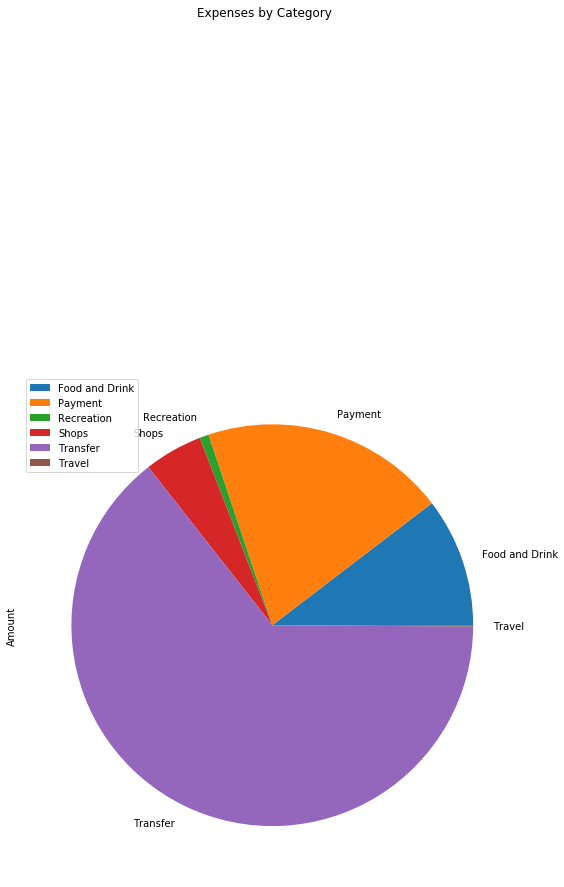

In [49]:
expenses_by_cat.plot(kind = "pie", subplots = True, title = "Expenses by Category", figsize = (9,18))

## Calculate the expenses per month

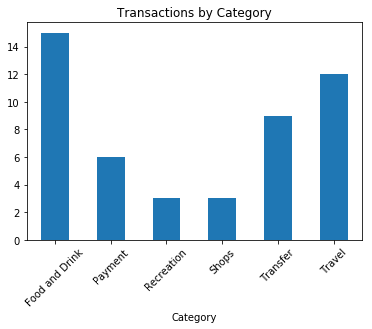

In [50]:
transactions_by_month = transactions_df.groupby('Category').count()
transactions_by_month['Amount'].plot(kind='bar', title = "Transactions by Category", rot = 45)

In [51]:
transactions_per_month = transactions_df.groupby(transactions_df.index.month).sum()
transactions_per_month

,Amount
Date,
4,500.00
5,10645.24
6,10645.24
7,10145.24


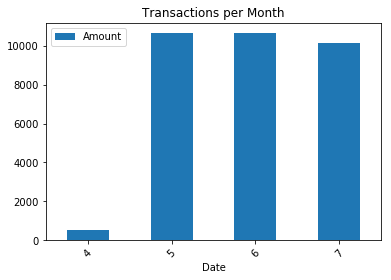

In [52]:
transactions_per_month.plot(kind = 'bar', title = "Transactions per Month", rot=45)